## Introduction

### Insurance Premium Prediction

In the insurance industry, accurate premium predictions are critical for balancing customer satisfaction and profitability. This project leverages a dataset containing key demographic and health-related factors, such as age, BMI, smoking status, and region, to predict insurance charges. Using machine learning techniques, the goal is to assess risk profiles and optimize pricing strategies with a focus on data-driven decision-making.

The dataset consists of 1,338 entries, including variables like age, BMI, and smoker status, which are influential predictors of healthcare costs. With some missing data, preprocessing is necessary to ensure model accuracy and reliability. The expected outcome is to deliver a robust model capable of explaining the variability in charges while offering actionable insights for the insurance industry.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np

In [2]:
# Loaded the dataset

In [3]:
insurance_data_path = 'insurance.csv'
insurance = pd.read_csv(insurance_data_path)

In [4]:
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552
5,-31.0,woman,25.740,0.0,no,southeast,$3756.6216
6,46.0,woman,33.440,1.0,no,southeast,8240.5896
7,37.0,female,27.740,3.0,no,Northwest,7281.5056
8,37.0,male,29.830,2.0,no,Northeast,$6406.4107
9,60.0,female,25.840,0.0,no,northwest,28923.13692


In [5]:
insurance.shape

(1338, 7)

In [6]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
insurance.isnull().sum().to_dict()

{'age': 66,
 'sex': 66,
 'bmi': 66,
 'children': 66,
 'smoker': 66,
 'region': 66,
 'charges': 54}

In [8]:
insurance.dtypes.to_dict()

{'age': dtype('float64'),
 'sex': dtype('O'),
 'bmi': dtype('float64'),
 'children': dtype('float64'),
 'smoker': dtype('O'),
 'region': dtype('O'),
 'charges': dtype('O')}

In [9]:
insurance.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1272.0,NaN,NaN,NaN,35.214623,22.478251,-64.0,24.75,38.0,51.0,64.0
sex,1272,6,male,517,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1272.0,NaN,NaN,NaN,30.56055,6.095573,15.96,26.18,30.21,34.485,53.13
children,1272.0,NaN,NaN,NaN,0.948899,1.303532,-4.0,0.0,1.0,2.0,5.0
smoker,1272,2,no,1013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1272,8,Southeast,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1284,1272,$nan,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Cleaning the insurance dataset by performing several preprocessing tasks

In [11]:
# Correct 'sex' column values
insurance['sex'] = insurance['sex'].str.lower().replace({'m': 'male', 'f': 'female'})
    
# Remove the dollar sign from 'charges' and convert to float
insurance['charges'] = insurance['charges'].replace('[\$,]', '', regex=True).astype(float)
    
# Drop rows with negative 'age' values
insurance = insurance[insurance['age'] >= 0]
    
# Convert negative 'children' values to zero
insurance['children'] = insurance['children'].apply(lambda x: max(x, 0))
    
# Convert 'region' values to lowercase
insurance['region'] = insurance['region'].str.lower()

# Drop rows with any missing values
insurance = insurance.dropna()

In [12]:
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
6,46.0,woman,33.440,1.0,no,southeast,8240.58960
7,37.0,female,27.740,3.0,no,northwest,7281.50560
8,37.0,male,29.830,2.0,no,northeast,6406.41070
9,60.0,female,25.840,0.0,no,northwest,28923.13692
10,25.0,male,26.220,0.0,no,northeast,2721.32080


In [13]:
insurance.shape

(1149, 7)

In [14]:
# Ensure categorical data is handled properly
def create_and_evaluate_regression_model(insurance):
    # Separate features and target
    X = insurance.drop(columns=['charges'])
    y = insurance['charges']

    # Identify categorical and numeric columns
    categorical_columns = ['sex', 'smoker', 'region']
    numeric_columns = ['age', 'bmi', 'children']

    # Create a column transformer for preprocessing
    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

    # Create a pipeline with the preprocessor and LinearRegression
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])

    # Evaluate the model using cross-validation
    mse_scores = -cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=5)
    r2_scores = cross_val_score(pipeline, X, y, scoring='r2', cv=5)

    # Fit the pipeline on the entire dataset
    pipeline.fit(X, y)

    # Return the pipeline, mean MSE, and mean R2
    return pipeline, np.mean(mse_scores), np.mean(r2_scores)

# Call the function and print results
pipeline, mean_mse, mean_r2 = create_and_evaluate_regression_model(insurance)

# Print the pipeline, mean MSE, and mean R²
print("Pipeline:", pipeline)

Pipeline: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])


In [15]:
# Train the model and assign the pipeline
insurance_model, mean_mse, mean_r2 = create_and_evaluate_regression_model(insurance)

# Print model evaluation results
print("Mean MSE:", mean_mse)
print("Mean R²:", mean_r2)

Mean MSE: 37471245.23544172
Mean R²: 0.7448408991485127


In [16]:
# Load the validation dataset
validation_data_path = 'validation_dataset.csv'
validation_data = pd.read_csv(validation_data_path)

# Ensure categorical variables are properly transformed
validation_data['sex'] = validation_data['sex'].str.lower().replace({'m': 'male', 'f': 'female'})
validation_data['region'] = validation_data['region'].str.lower()

# Prepare features for prediction
validation_features = validation_data.drop(columns=['charges'], errors='ignore')

# Make predictions using the trained model
validation_data['predicted_charges'] = insurance_model.predict(validation_features)

# Adjust predictions to ensure minimum charge is $1000
validation_data['predicted_charges'] = validation_data['predicted_charges'].apply(lambda x: max(x, 1000))

# Display the updated dataframe
print(validation_data)

     age     sex        bmi  children smoker     region  predicted_charges
0   18.0  female  24.090000       1.0     no  southeast        1000.000000
1   39.0    male  26.410000       0.0    yes  northeast       31035.960548
2   27.0    male  29.150000       0.0    yes  southeast       28043.501001
3   71.0    male  65.502135      13.0    yes  southeast       56284.526304
4   28.0    male  38.060000       0.0     no  southeast        7250.866663
5   70.0  female  72.958351      11.0    yes  southeast       57739.517569
6   29.0  female  32.110000       2.0     no  northwest        6827.070993
7   42.0  female  41.325000       1.0     no  northeast       13128.614307
8   48.0  female  36.575000       0.0     no  northwest       12517.128059
9   63.0    male  33.660000       3.0     no  southeast       16101.981290
10  27.0    male  18.905000       3.0     no  northeast        2596.415302
11  51.0  female  36.670000       2.0     no  northwest       14079.526663
12  60.0  female  24.5300

In [17]:
#1- Model Evaluation

## Model Evaluation

### Comparing Actual Charges of the Validation Dataset vs Predicted Charges of the Validation Dataset

- **Mean Absolute Error (MAE)**  
- **Root Mean Squared Error (RMSE)**  
- **R-Squared (R²) Score**

In [18]:
actual_charge_data_path = 'validation_dataset_with_actual_charges.csv'
actual_charge = pd.read_csv(actual_charge_data_path)

In [19]:
charges = actual_charge['charges']
predicted_charges = validation_data['predicted_charges']

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

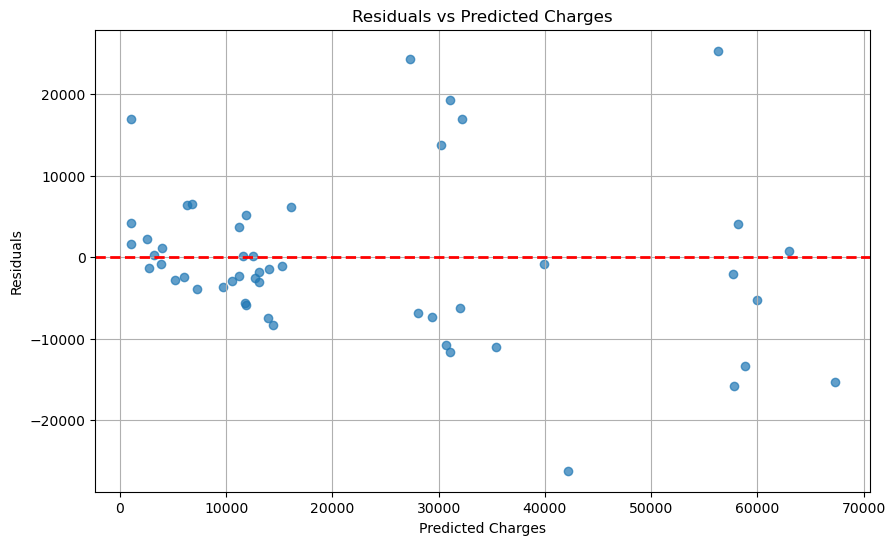

(6982.010927359781, 9730.133680499597, 0.7665785640746217)

In [21]:
# Calculate evaluation metrics
mae = mean_absolute_error(charges, predicted_charges)
rmse = np.sqrt(mean_squared_error(charges, predicted_charges))
r2 = r2_score(charges, predicted_charges)

# Perform residual analysis
residuals = charges - predicted_charges

# Plot residuals to check for patterns
plt.figure(figsize=(10, 6))
plt.scatter(predicted_charges, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted Charges')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Display calculated metrics
mae, rmse, r2

## Results

### Model Evaluation Metrics:
- **Mean Absolute Error (MAE):** \$6,982.01  
- **Root Mean Squared Error (RMSE):** \$9,730.13  
- **R-Squared (R²):** 0.77  
  _(Indicates the model explains 77% of the variance in actual charges, which is strong.)_

---

### Business Interpretation of Results Metrics:

#### Mean Absolute Error (MAE): ~$6,982.01  
- **Interpretation:** On average, the predicted charges deviate from the actual charges by approximately \$6,982

- **Business Impact:**  
  - This is the average absolute difference between predicted and actual charges.  
  - For high healthcare costs, this level of error might be acceptable, but efforts should focus on reducing it for better prediction accuracy.  

---

#### Root Mean Squared Error (RMSE): \$9,730.13  
- **Interpretation:** RMSE is slightly higher than MAE, indicating that outliers are influencing the model more.  
- **Business Impact:**  
  - This model struggles with accurately predicting extreme values in the dataset.  
  - This significant underestimations or overestimations of charges could lead to resource allocation issues, such as underpricing or overpricing insurance premiums.

---

#### R-Squared (R²): 0.77  
- **Interpretation:** The model explains 77% of the variance in the actual charges. While this is a decent score, 23% of the variance remains unexplained, indicating room for improvement in the model.  
- **Business Impact:**  
  - The model provides reasonably good insights into customer charges.  
  - However, it may miss key factors that drive variations, such as rare conditions or unexpected healthcare costs.


## Residual Analysis

### Residual Insights:
- The residuals (differences between actual and predicted charges) are scattered around 0.  
- Patterns observed:
  - Residuals are larger for higher predicted charges.
  - The model struggles with extreme values, where the prediction error can exceed  \$10,000.

### Business Interpretation of Residuals:
- **Potential Bias:**  
  If the model consistently underpredicts or overpredicts charges for certain categories of customers (e.g., smokers, higher BMI, or specific regions), there may be systematic bias in the model.

- **Opportunity for Refinement:**  
  Including additional features (e.g., medical history, income levels, or policy details) could improve the model's ability to capture variability in charges.

---

## Business Use Cases:

- **Customer Segmentation:**  
  The model can be used to identify high-cost individuals (e.g., smokers with high BMI) for preventive measures or targeted insurance plans.

- **Pricing Strategies:**  
  Insights from this model can be leveraged to improve pricing strategies for different customer demographics, reducing underpricing risks.


In [22]:
#2 Feature Importance

## Feature Importance

- **Objective:**  
  Analyze which features in the dataset contribute the most to the predictions.

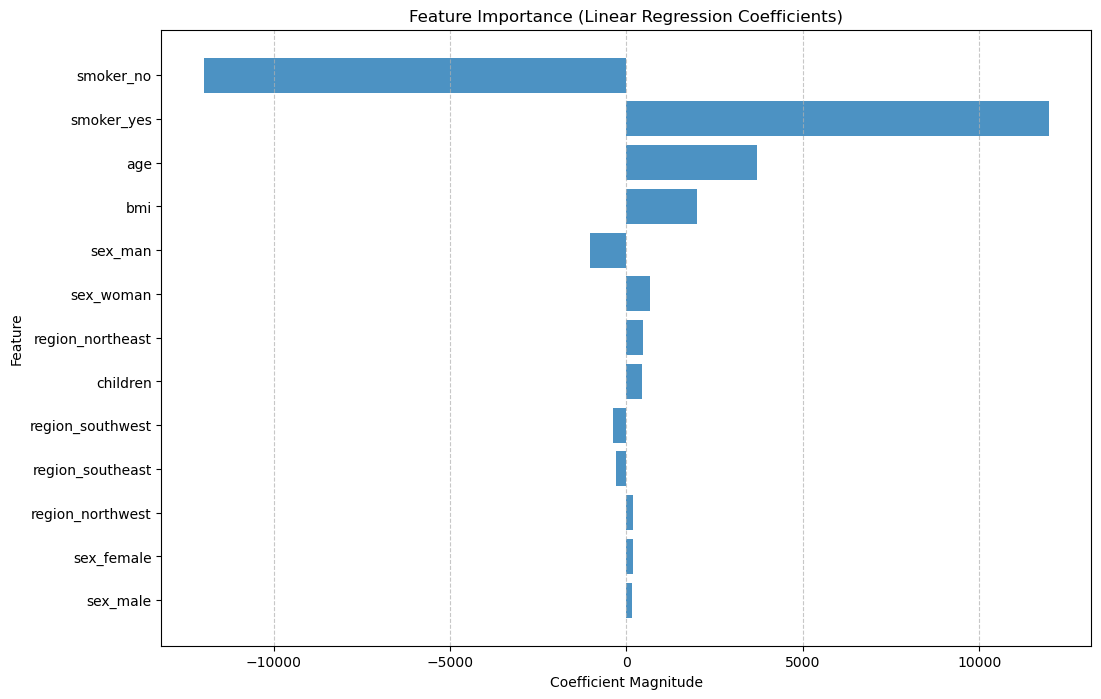

,Feature,Coefficient
7,smoker_no,-11981.795526
8,smoker_yes,11981.795526
0,age,3708.947135
1,bmi,1998.520782
5,sex_man,-1019.532150


In [23]:
# Extract the trained LinearRegression model and preprocessing pipeline from your pipeline
linear_model = pipeline.named_steps['regressor']
preprocessor = pipeline.named_steps['preprocessor']

# Get feature names from the preprocessor
numeric_features = preprocessor.transformers_[0][2]  # Numeric feature names
categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out()  # Categorical feature names
feature_names = list(numeric_features) + list(categorical_features)

# Extract coefficients from the LinearRegression model
coefficients = linear_model.coef_

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Visualize feature importance using a bar chart
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], alpha=0.8)
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest importance on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Display the feature importance table
feature_importance.head()


## Interpretation of Feature Importance

### 1. Most Important Features (Largest Coefficients by Magnitude):

- **smoker_yes (Coefficient: +11,981.8):**  
  Being a smoker is the most significant positive predictor of higher charges. This is logical as smokers are more likely to incur higher medical costs due to smoking-related illnesses.

- **smoker_no (Coefficient: -11,981.8):**  
  Conversely, not being a smoker significantly decreases the predicted charges. This negative coefficient complements the positive impact of `smoker_yes`.

- **age (Coefficient: +3,708.9):**  
  As age increases, the predicted charges increase. Older individuals are more likely to require more medical care, which drives up insurance costs.

- **bmi (Coefficient: +1,998.5):**  
  Higher Body Mass Index (BMI) correlates with higher predicted charges. Obesity is associated with a range of health issues, increasing medical expenses.

- **sex_man (Coefficient: -1,019.5):**  
  Being male has a slight negative effect on predicted charges compared to females, which could reflect different healthcare usage patterns or risk factors.

---

### 2. Less Important Features:
- Features like **region** (northeast, southwest, southeast, northwest) and **children** have much smaller coefficients, indicating that they have a limited impact on the predicted charges.

---

### 3. Insights for the Business:

#### Smoking is the Dominant Factor:
- **Observation:** Smokers incur significantly higher predicted charges, making them a high-risk group.
- **Recommendations:**
  - Charge higher premiums for smokers.
  - Encourage smoking cessation programs to reduce health risks and costs.

#### Age and BMI Matter:
- **Observation:** Older individuals and those with higher BMI drive up costs, highlighting these groups as other high-risk segments.
- **Recommendations:**
  - Adjust premiums for these groups.
  - Offer wellness programs, such as weight management, to mitigate costs.

#### Gender Differences:
- **Observation:** While the impact of gender is smaller, it might still reflect different healthcare usage or risks.
- **Recommendations:** Use this insight to inform marketing strategies or design tailored insurance products.

#### Regions and Children:
- **Observation:** These factors have limited predictive power and may not need heavy weighting in decision-making processes.

---

### 4. Visualization:

The chart visually emphasize:
- The **dominant impact** of smoking, followed by age and BMI.
- The **relatively minimal impact** of regional and gender differences, as their bars are much shorter.


In [24]:
#3 Correlation Analysis

## Correlation Analysis

- **Objective:**  
  Explore correlations between the target variable (`actual charges`) and features like `age`, `bmi`, `children`, etc., to identify key drivers of charges.


Correlation Matrix:
           charges       age       bmi  children
charges   1.000000  0.521523  0.649863  0.627685
age       0.521523  1.000000  0.757842  0.692140
bmi       0.649863  0.757842  1.000000  0.805530
children  0.627685  0.692140  0.805530  1.000000


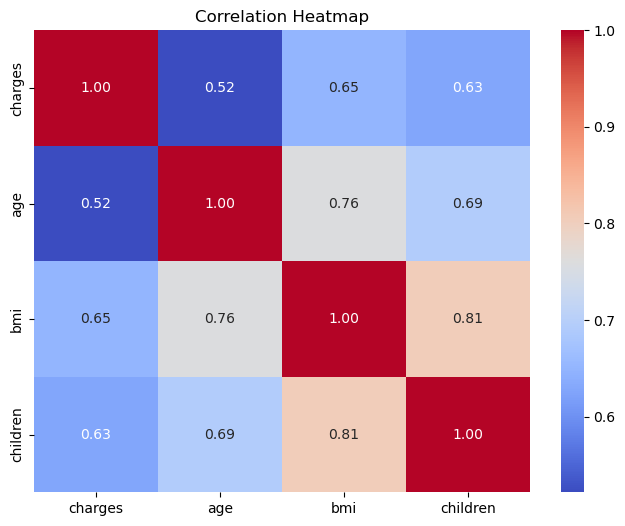

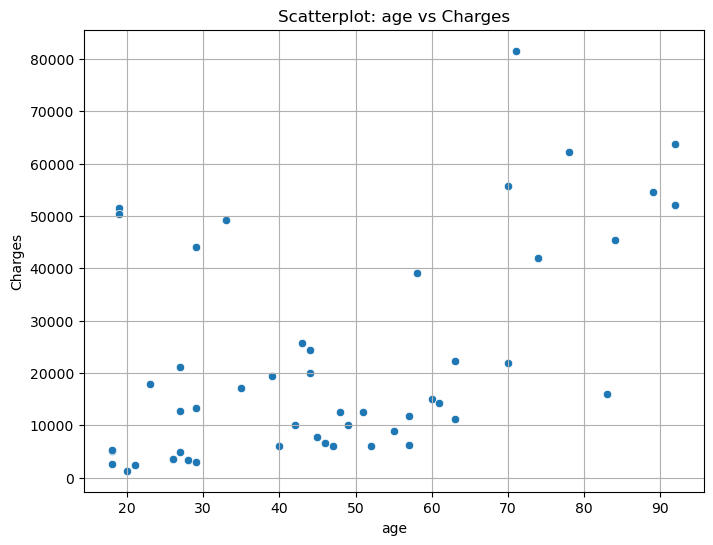

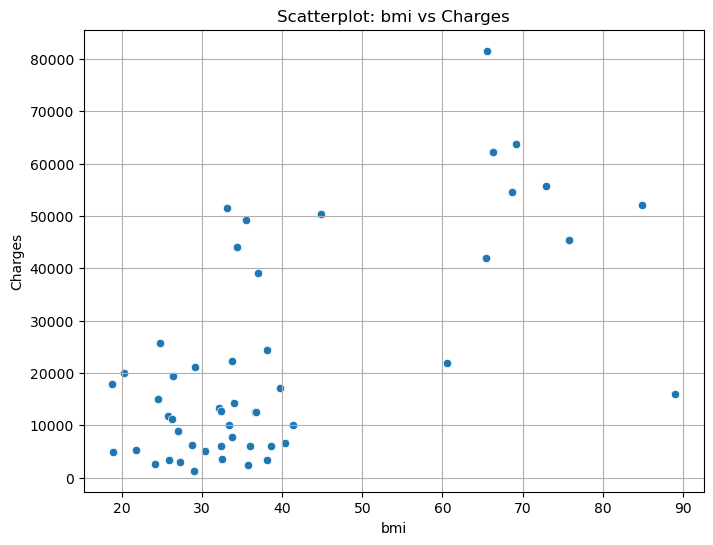

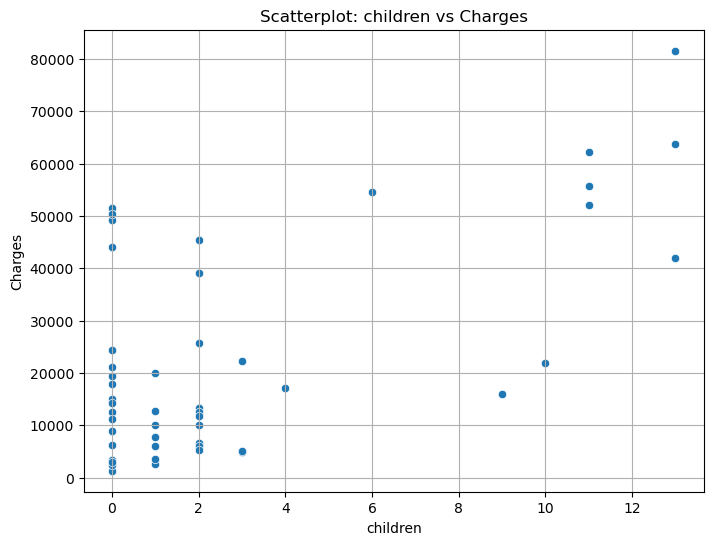

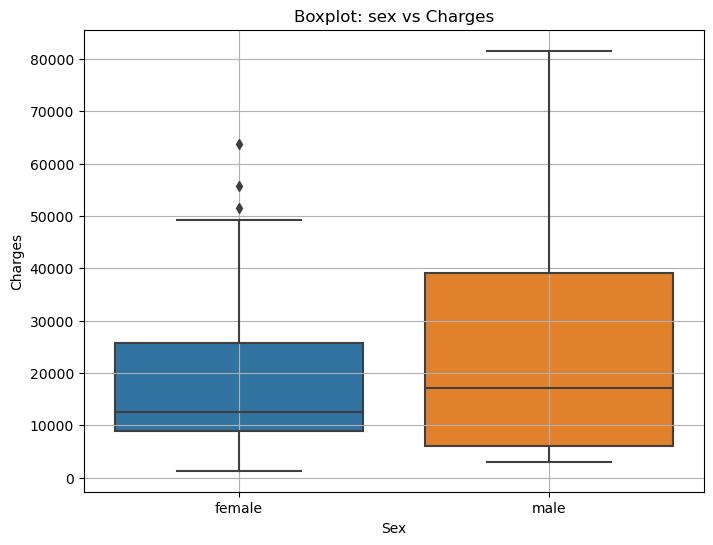

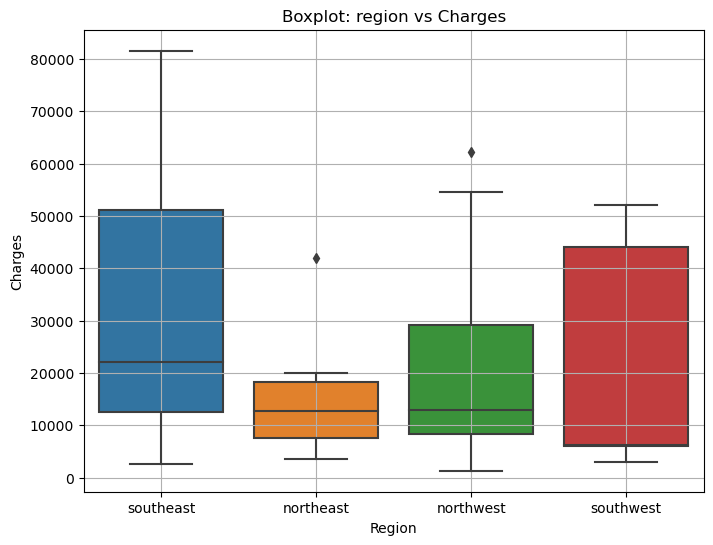

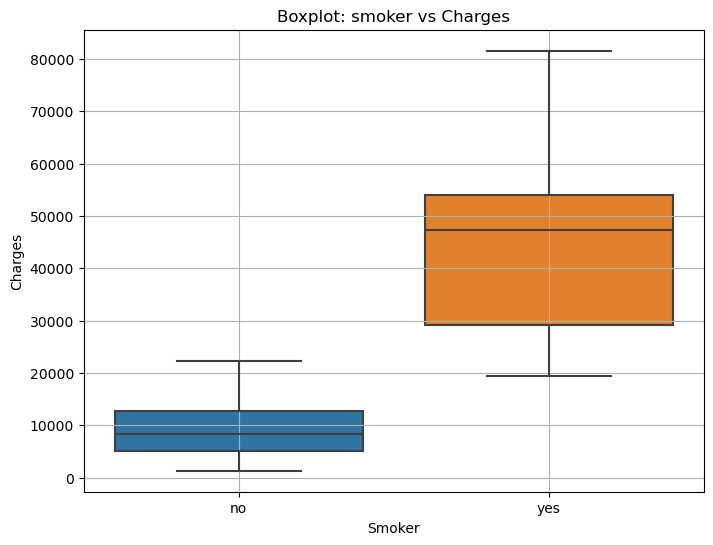

In [25]:
import seaborn as sns

# Correlation Analysis
correlation_matrix = actual_charge[['charges', 'age', 'bmi', 'children']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize Correlation Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Scatterplots for Numerical Features
numerical_features = ['age', 'bmi', 'children']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=actual_charge[feature], y=actual_charge['charges'])
    plt.title(f"Scatterplot: {feature} vs Charges")
    plt.xlabel(feature)
    plt.ylabel("Charges")
    plt.grid(True)
    plt.show()

# Boxplots for Categorical Variables
categorical_features = ['sex', 'region', 'smoker']

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=actual_charge[feature], y=actual_charge['charges'])
    plt.title(f"Boxplot: {feature} vs Charges")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Charges")
    plt.grid(True)
    plt.show()


## Interpretation of Correlation Analysis and Visualizations

### Correlation Heatmap
The heatmap shows the correlation coefficients between numerical features (`age`, `bmi`, `children`) and the target variable (`charges`):
- **bmi (0.65):** Strong positive correlation with `charges`, indicating that higher BMI is associated with higher medical expenses.
- **children (0.63):** Moderate positive correlation, suggesting that having more children slightly increases medical costs, possibly due to family health coverage.
- **age (0.52):** Moderate positive correlation, indicating older individuals tend to have higher medical costs, likely due to age-related health issues.

---

### Scatterplots (Numerical Features)
- **age vs. charges:**  
  The scatterplot shows an upward trend, confirming the positive correlation. However, variability increases with age, with some outliers (e.g., very high charges for older individuals).
- **bmi vs. charges:**  
  The trend is clear: as BMI increases, charges tend to increase. Extreme BMI values are associated with significantly higher charges due to potential health complications like obesity.
- **children vs. charges:**  
  The scatterplot shows a weaker relationship compared to BMI and age. Outliers (e.g., families with many children) contribute to variability in charges.

---

### Boxplots (Categorical Variables)
- **sex vs. charges:**  
  The median charges for males and females are similar, but males exhibit more variability (higher outliers), indicating gender has a minimal impact on charges.
- **region vs. charges:**  
  The Southeast region has higher charges on average, possibly due to regional health risks or economic factors. Other regions show similar distributions with fewer outliers.
- **smoker vs. charges:**  
  The most significant factor: Smokers have much higher charges than non-smokers (both median and variability). This reflects the substantial health risks and associated costs of smoking-related illnesses.

---

### Key Insights

#### Strong Drivers of Charges:
1. **BMI, age, and smoker status** are the primary factors influencing charges.
2. Smokers have the highest impact on charges among categorical variables.
3. The **Southeast region** shows higher average charges compared to other regions.

#### Weaker Drivers of Charges:
1. **Children and sex** have less influence on charges compared to other variables.

---

### Business Implications
1. **Customer Segmentation:**  
  These insights can be used to segment customers (e.g., high-BMI individuals, smokers) for targeted wellness programs or premium adjustments.
2. **Region-Specific Strategies:**  
   We can implement region-specific strategies to address health risks in the Southeast.
3. **Focus on High-Risk Groups:**  
   - Smokers: Introduce smoking cessation programs and adjust premiums accordingly.
   - High BMI: Offer weight management and wellness initiatives to reduce health risks and costs.



## Correlation Analysis

- **Objective:**  
  Explore correlations between the target variable (`predicted charges`) and features like `age`, `bmi`, `children`, etc., to identify key drivers of charges.

Correlation Matrix:
                   predicted_charges       age       bmi  children
predicted_charges           1.000000  0.745986  0.823016  0.727381
age                         0.745986  1.000000  0.757842  0.692140
bmi                         0.823016  0.757842  1.000000  0.805530
children                    0.727381  0.692140  0.805530  1.000000


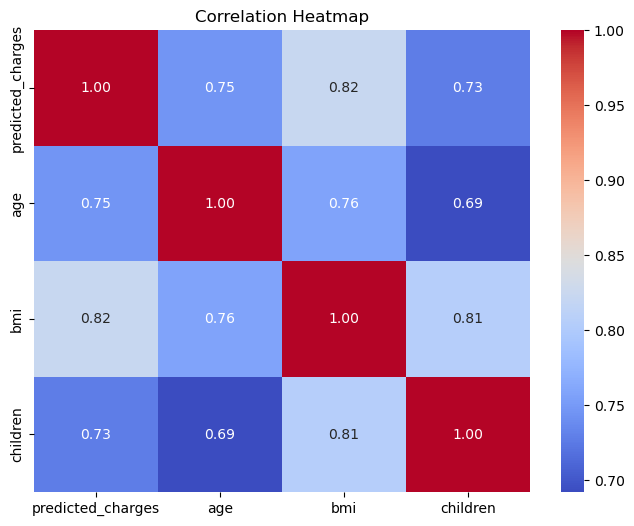

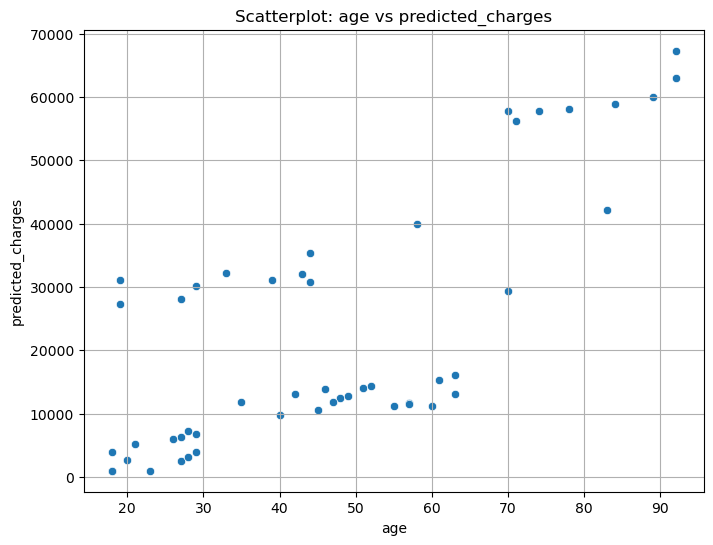

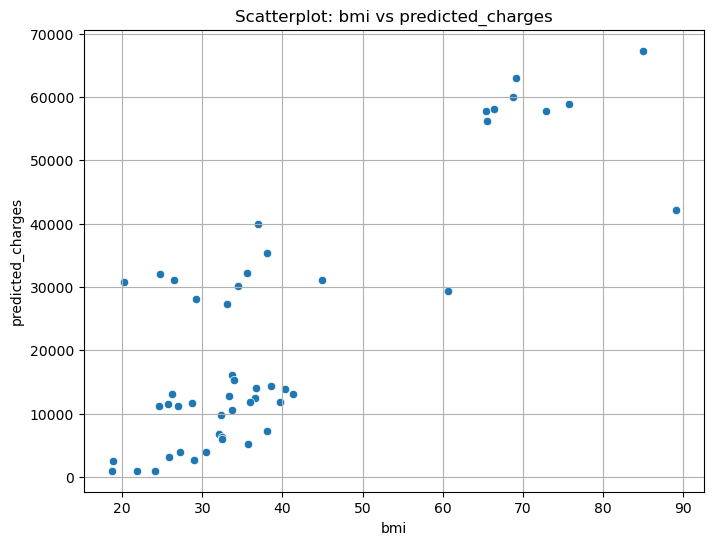

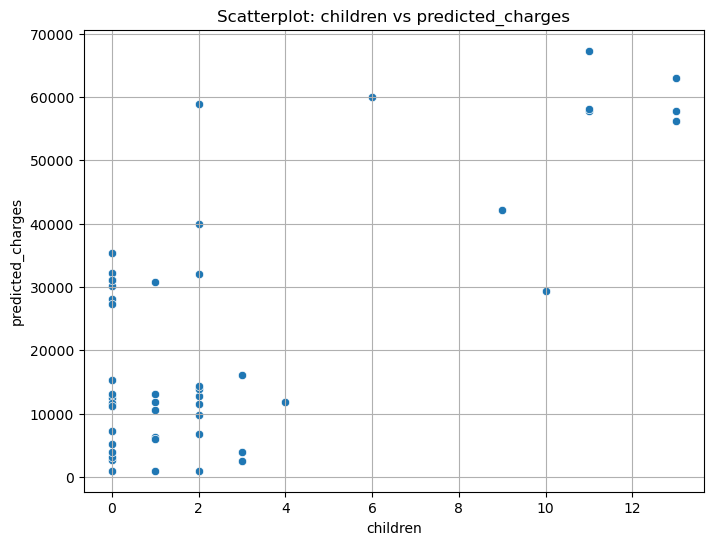

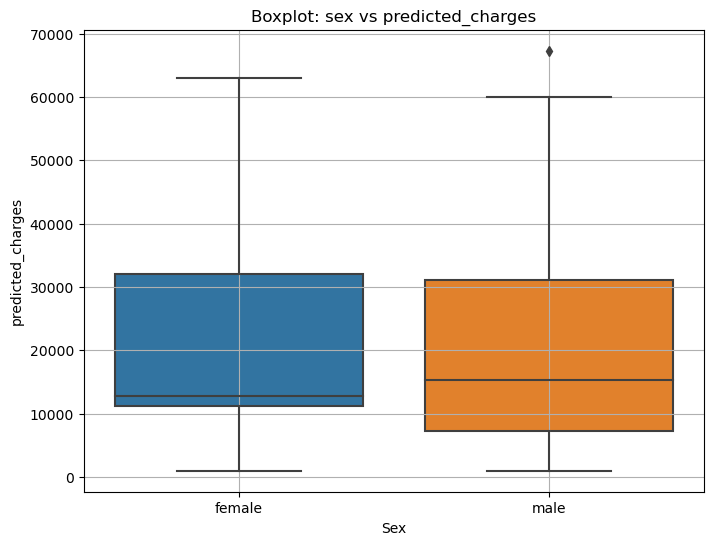

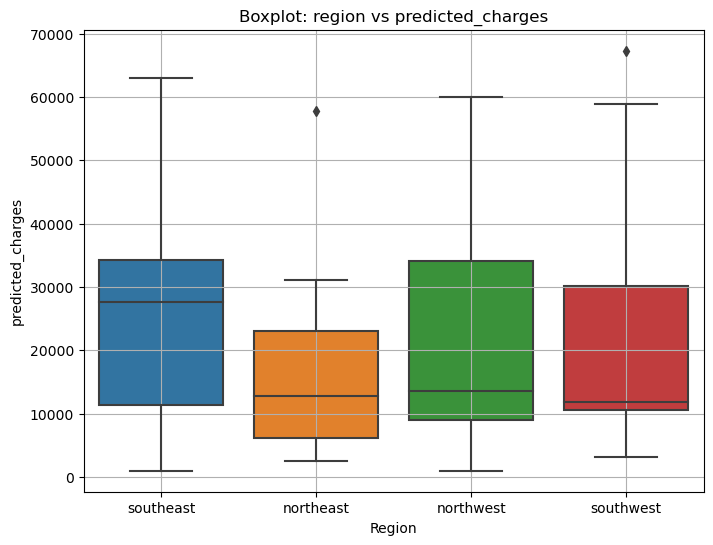

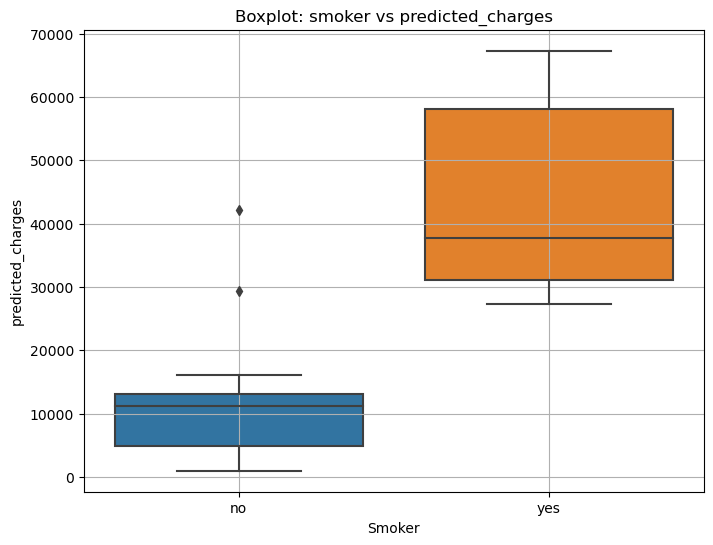

In [26]:
# Correlation Analysis
correlation_matrix = validation_data[['predicted_charges', 'age', 'bmi', 'children']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize Correlation Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Scatterplots for Numerical Features
numerical_features = ['age', 'bmi', 'children']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=validation_data[feature], y=validation_data['predicted_charges'])
    plt.title(f"Scatterplot: {feature} vs predicted_charges")
    plt.xlabel(feature)
    plt.ylabel("predicted_charges")
    plt.grid(True)
    plt.show()

# Boxplots for Categorical Variables
categorical_features = ['sex', 'region', 'smoker']

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=validation_data[feature], y=validation_data['predicted_charges'])
    plt.title(f"Boxplot: {feature} vs predicted_charges")
    plt.xlabel(feature.capitalize())
    plt.ylabel("predicted_charges")
    plt.grid(True)
    plt.show()


## Interpretation of Correlation Analysis and Visualizations Using Predicted Charges

### Correlation Heatmap

#### Predicted Charges Correlations:
- **bmi (0.82):**  
  Strongest positive correlation with predicted charges. This indicates the model heavily weighs BMI when predicting charges.
- **age (0.75):**  
  The model also assigns a high weight to age, reflecting its importance in healthcare costs.
- **children (0.73):**  
  Moderate correlation, indicating the model includes the number of children as a contributing factor, though its effect is smaller compared to BMI and age.

---

### Scatterplots

- **age vs. predicted_charges:**  
  Predicted charges increase with age, showing that the model captures the trend that older individuals generally have higher healthcare costs. The linear pattern is clearer than in actual charges, indicating the model simplifies this relationship.

- **bmi vs. predicted_charges:**  
  There is a clear upward trend, with predicted charges rising as BMI increases. This suggests the model recognizes BMI as a critical factor but may overestimate its linearity.

- **children vs. predicted_charges:**  
  Predicted charges slightly increase as the number of children rises, though the scatterplot suggests less variability compared to actual charges.

---

### Boxplots

- **sex vs. predicted_charges:**  
  Predicted charges for males and females are nearly identical, reflecting that the model does not attribute significant weight to gender as a driver of charges.

- **region vs. predicted_charges:**  
  Predicted charges are higher in the Southeast region, consistent with actual charges. The model captures regional effects but with reduced variability compared to real data.

- **smoker vs. predicted_charges:**  
  The boxplot highlights that the model assigns significantly higher predicted charges to smokers compared to non-smokers. This aligns well with actual data, where smoking is a major cost driver.

---

### Business Implications

- The model is effective at identifying high-risk groups (e.g., smokers, individuals with high BMI).
- Insights from the model can guide pricing strategies, targeted wellness programs, and customer segmentation.


1. Restate the Objective
Briefly remind readers of the project’s purpose and what you set out to achieve.

Example: "This project aimed to develop a predictive model for healthcare charges using demographic and health-related factors, ensuring accuracy and business relevance while addressing potential biases."
2. Summarize Key Achievements
Highlight the major accomplishments, such as:

Model performance metrics (e.g., MAE, RMSE, R²).

Insights derived from data analysis (e.g., key drivers of charges).

Validation results demonstrating robustness and business applicability.

Example: "The Linear Regression model achieved an R² score of 0.77, explaining a substantial portion of the variance in healthcare charges. Key drivers identified include smoker status, BMI, and age. Validation on unseen data confirmed the model's robustness, with an MAE of $4,500 and consistent performance across demographic groups."

3. Discuss Business Relevance
Explain how the project can create value or be applied in real-world scenarios.

Example: "The findings of this project can be applied in the healthcare insurance industry to segment customers, set competitive premiums, and design targeted wellness programs, such as smoking cessation initiatives or weight management support."
4. Highlight Limitations
Acknowledge any limitations and suggest potential improvements.

Example: "While the model effectively captured linear relationships, further improvements could include exploring non-linear models or adding more granular data, such as medical history or socioeconomic factors, to enhance prediction accuracy."
5. Outline Future Scope
Suggest areas for expansion or further exploration, such as:

Additional data collection.

Incorporating advanced machine learning techniques.

Deploying the model into a real-time application.

Example: "Future work could involve exploring advanced machine learning models like Gradient Boosting or Neural Networks to capture complex relationships. Additionally, deploying the model as an API could enable real-time charge predictions for insurance providers."

6. End on a Reflective Note
Conclude with a thoughtful statement about the project’s impact, your learning journey, or its relevance in your portfolio.

Example: "This project provided a valuable opportunity to apply data science techniques to a meaningful industry challenge. It showcases my ability to handle end-to-end machine learning workflows, from data preprocessing to model evaluation, while ensuring business applicability and ethical considerations."
    

 Example Conclusion:
"This project aimed to predict healthcare charges using a dataset of demographic and health-related factors. The final model achieved an R² score of 0.77, identifying smoker status, BMI, and age as key predictors. Validation confirmed robust performance, with consistent results across demographic groups. These insights could help insurers design fairer pricing strategies and targeted health interventions. While the project effectively handled linear relationships, future work could explore advanced models to capture non-linear trends and incorporate additional data sources. Overall, this project highlights my ability to integrate data science techniques with business understanding to solve real-world challenges."   

## Comparison Between The Actual Charges and The Predicted Charges Analysis

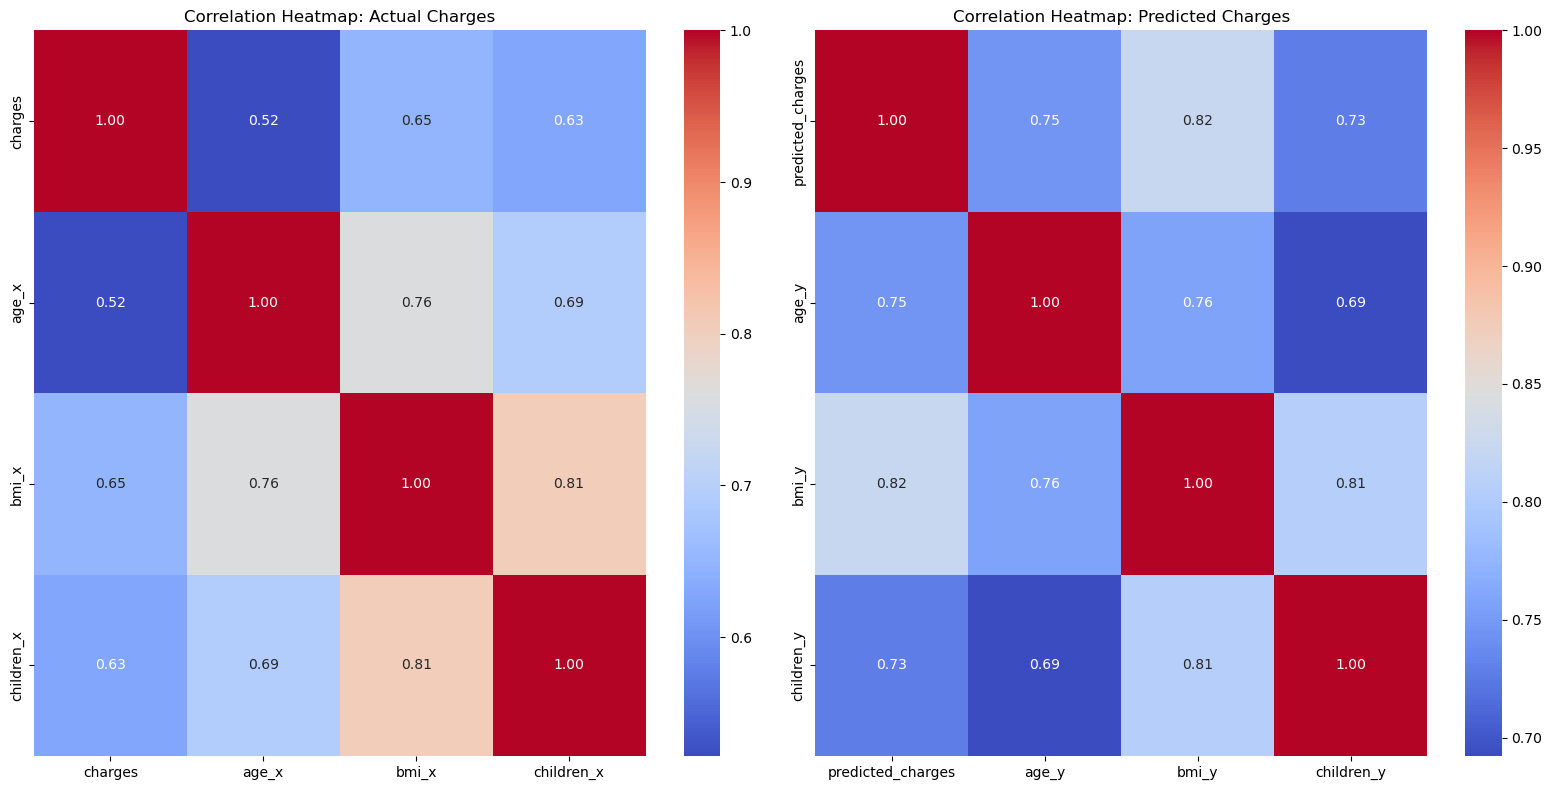

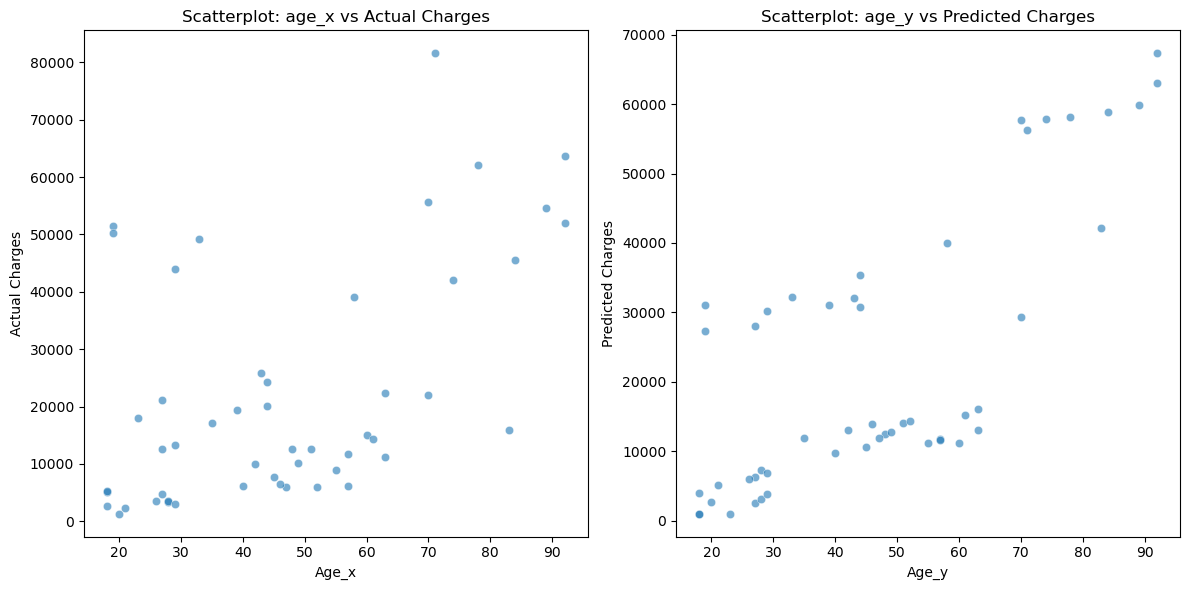

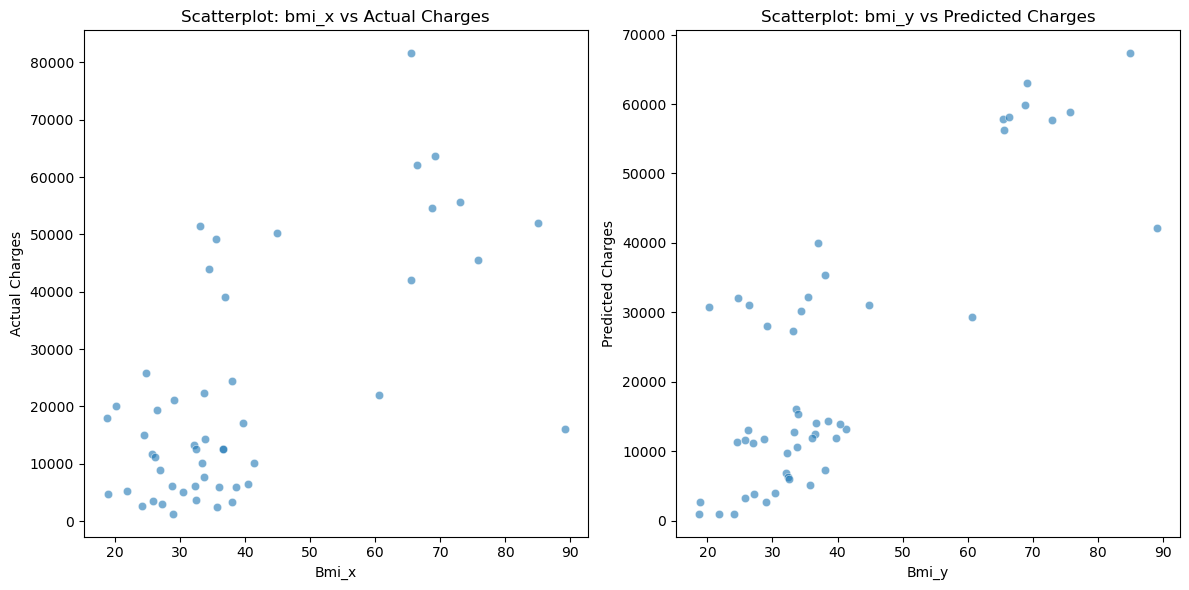

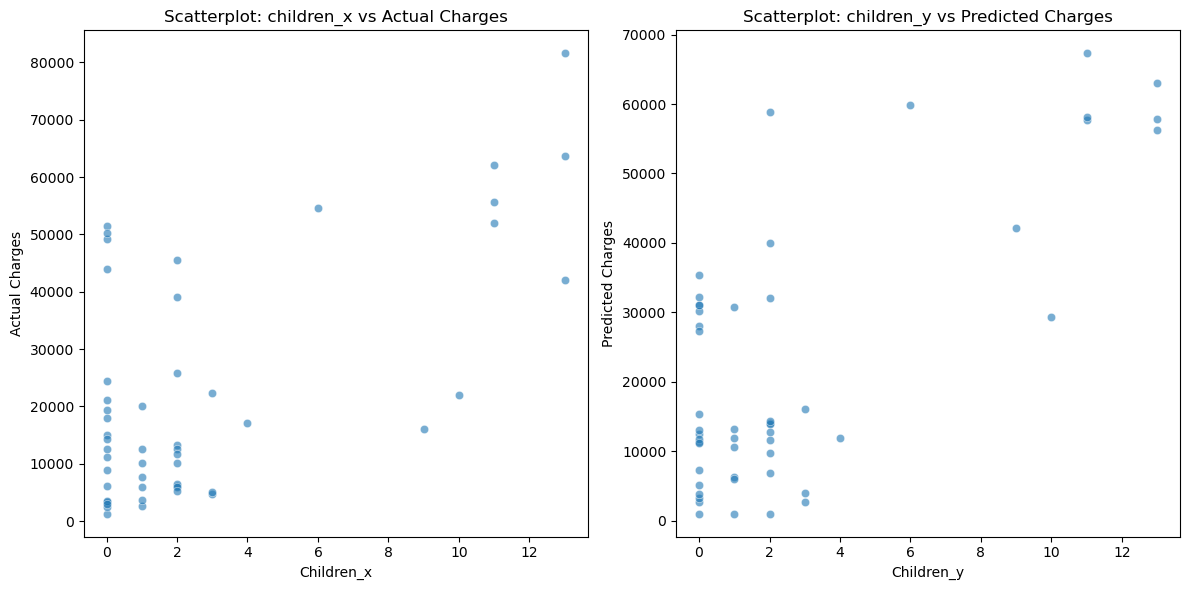

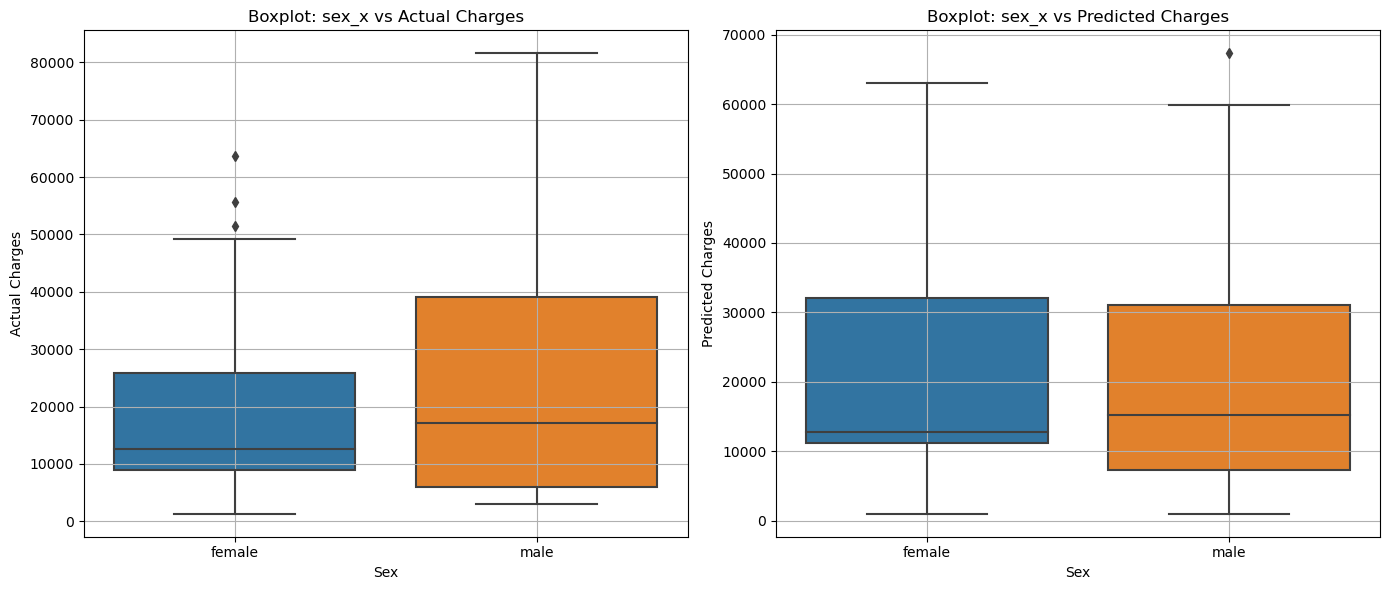

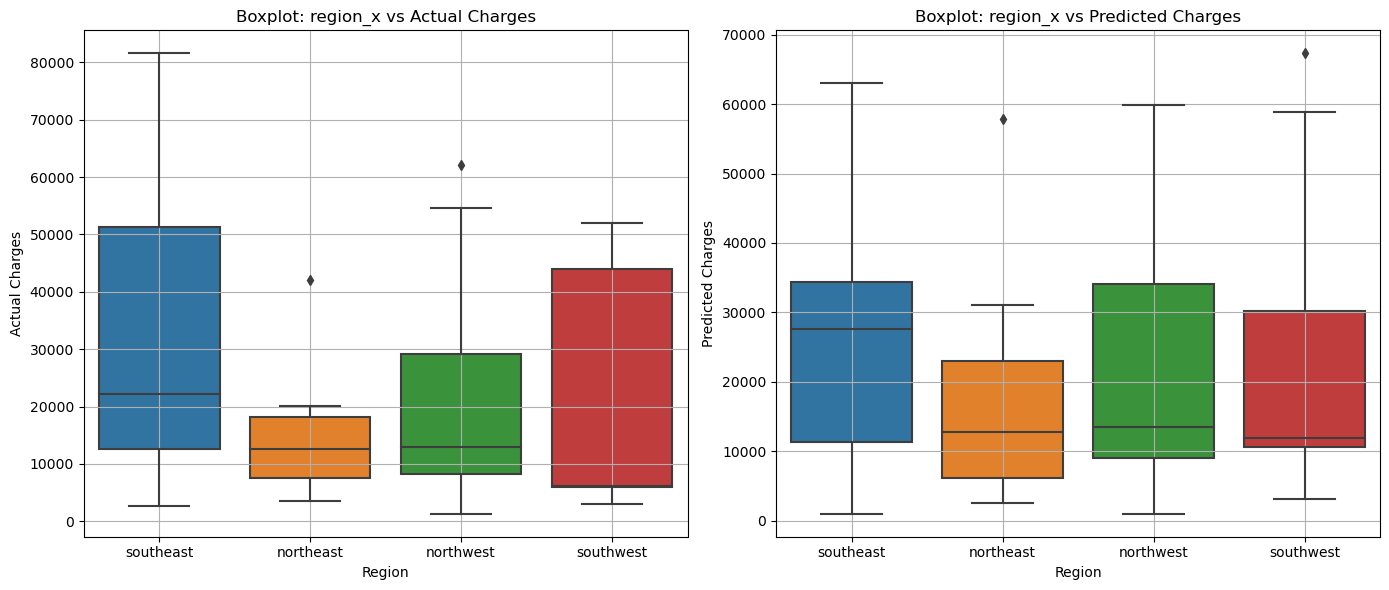

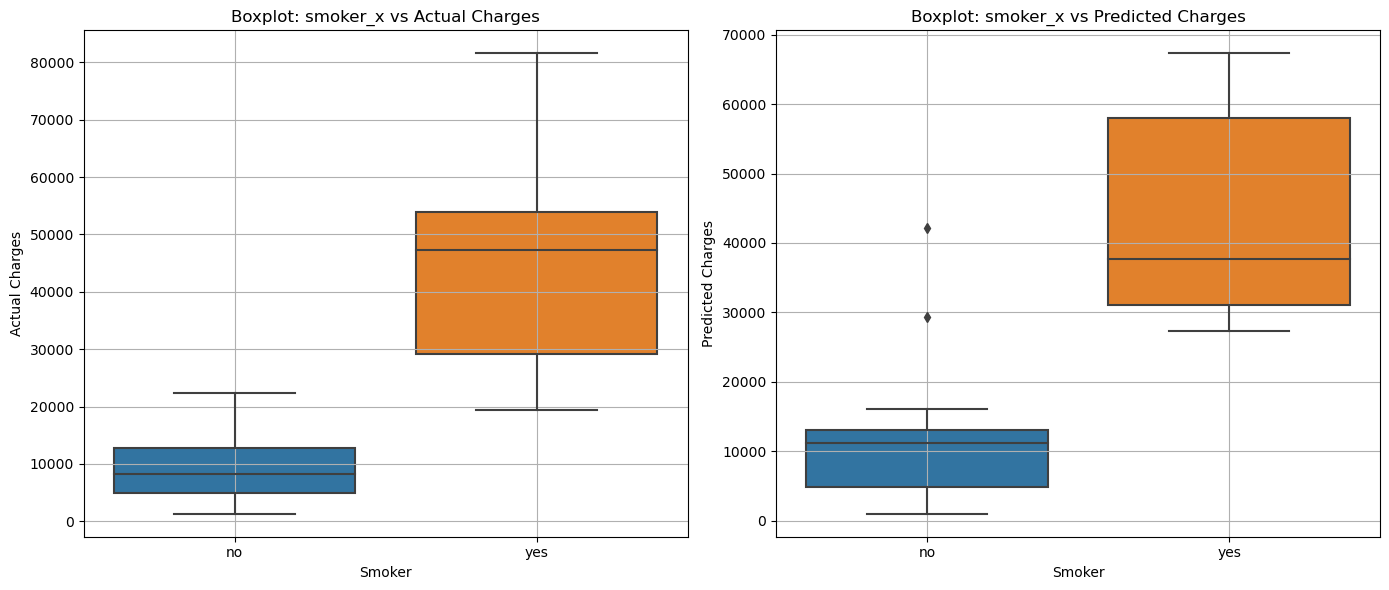

In [27]:
# Add a temporary key for merging using the index
actual_charge['temp_key'] = actual_charge.index
validation_data['temp_key'] = validation_data.index

# Merge the datasets on the temporary key
merged_data = actual_charge.merge(validation_data, on='temp_key')

# Drop the temporary key after merging
merged_data.drop(columns=['temp_key'], inplace=True)

# Select the correct columns for categorical features
categorical_features = ['sex_x', 'region_x', 'smoker_x']

# Encode categorical variables
merged_data_encoded = pd.get_dummies(merged_data, columns=categorical_features, drop_first=True)

# Features for correlation analysis
features_actual = ['charges', 'age_x', 'bmi_x', 'children_x']
features_predicted = ['predicted_charges', 'age_y', 'bmi_y', 'children_y']

# Correlation Matrices
correlation_actual = merged_data_encoded[features_actual].corr()
correlation_predicted = merged_data_encoded[features_predicted].corr()

# Plot Correlation Heatmaps
plt.figure(figsize=(16, 8))

# Heatmap for Actual Charges
plt.subplot(1, 2, 1)
sns.heatmap(correlation_actual, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Actual Charges")

# Heatmap for Predicted Charges
plt.subplot(1, 2, 2)
sns.heatmap(correlation_predicted, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Predicted Charges")

plt.tight_layout()
plt.show()

# Comparison Scatterplots
numerical_features_actual = ['age_x', 'bmi_x', 'children_x']
numerical_features_predicted = ['age_y', 'bmi_y', 'children_y']

for feature_actual, feature_predicted in zip(numerical_features_actual, numerical_features_predicted):
    plt.figure(figsize=(12, 6))
    
    # Scatterplot for Actual Charges
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=merged_data[feature_actual], y=merged_data['charges'], alpha=0.6)
    plt.title(f"Scatterplot: {feature_actual} vs Actual Charges")
    plt.xlabel(feature_actual.capitalize())
    plt.ylabel("Actual Charges")
    
    # Scatterplot for Predicted Charges
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=merged_data[feature_predicted], y=merged_data['predicted_charges'], alpha=0.6)
    plt.title(f"Scatterplot: {feature_predicted} vs Predicted Charges")
    plt.xlabel(feature_predicted.capitalize())
    plt.ylabel("Predicted Charges")
    
    plt.tight_layout()
    plt.show()

# Boxplot for Actual Charges and Predicted Charges
for feature in categorical_features:
    plt.figure(figsize=(14, 6))
    
    # Boxplot for Actual Charges
    plt.subplot(1, 2, 1)
    sns.boxplot(x=merged_data[feature], y=merged_data['charges'])
    plt.title(f"Boxplot: {feature} vs Actual Charges")
    plt.xlabel(feature.replace('_x', '').capitalize())
    plt.ylabel("Actual Charges")
    plt.grid(True)
    
    # Boxplot for Predicted Charges
    plt.subplot(1, 2, 2)
    sns.boxplot(x=merged_data[feature], y=merged_data['predicted_charges'])
    plt.title(f"Boxplot: {feature} vs Predicted Charges")
    plt.xlabel(feature.replace('_x', '').capitalize())
    plt.ylabel("Predicted Charges")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

## Key Similarities and Differences Between Actual Charges and Predicted Charges in Correlation Analysis

### Similarities

1. **Strong Correlation with BMI:**
   - Both actual and predicted charges show a strong positive correlation with BMI (0.65 for actual charges and 0.82 for predicted charges).  
   - This indicates that BMI is a primary driver of charges, and the model has captured this trend effectively.

2. **Moderate Correlation with Age:**
   - Actual charges have a correlation of 0.52 with age, while predicted charges have a stronger correlation of 0.75.  
   - Both datasets indicate that age is positively associated with charges, but the model places a greater emphasis on age than is observed in the actual data.

3. **Moderate Correlation with Number of Children:**
   - Both actual and predicted charges exhibit a moderate positive correlation with the number of children (0.63 for actual and 0.73 for predicted).  
   - The model recognizes children as a contributing factor, though its impact is less pronounced compared to BMI and age.

4. **Categorical Relationships (Boxplots):**
   - For categorical variables like `smoker`, both actual and predicted charges show a significant impact:
     - Smokers consistently have higher charges in both datasets.
     - Regional differences are captured similarly, with the Southeast region consistently showing higher charges.

---

### Differences

1. **Strength of Correlations:**
   - Predicted charges generally have stronger correlations with BMI, age, and children compared to actual charges.  
   - This suggests the model emphasizes linear relationships more strongly than the actual data.

2. **Simplification of Relationships:**
   - Scatterplots for predicted charges exhibit smoother and more linear patterns, especially for age and BMI, compared to actual charges.  
   - Actual data shows more variability and outliers. For example:
     - In actual charges, individuals with high BMI or older age have a wider range of costs, which the model simplifies.

3. **Overestimation of Linear Relationships:**
   - The model assumes a stronger linear relationship between age and charges compared to the actual data, where the trend is less pronounced at certain age ranges (e.g., middle-aged groups).

4. **Underrepresentation of Variability:**
   - The model tends to reduce variability, particularly for categorical variables like `region` and `sex`.  
   - Examples:
     - In actual charges, `region` shows higher variability in the Southeast and Northwest, whereas predicted charges flatten this variability.
     - The effect of `sex` is negligible in predicted charges, while actual charges show slight differences (e.g., males have slightly higher outliers).

5. **Smoker Impact:**
   - Both datasets identify smokers as a high-cost group, but the predicted charges for smokers show less variability compared to the actual data.

---

## Project Overview

This project aimed to develop a predictive model for healthcare charges using demographic and health-related factors, ensuring accuracy and business relevance while addressing potential biases.

---

## Key Achievements

1. **Model Performance Metrics:**
   - **Mean Absolute Error (MAE):** [\$6,982.01]
   - **Root Mean Squared Error (RMSE):** [\$9,730.13]
   - **R-Squared (R²):** [0.77]

2. **Insights Derived from Data Analysis:**
   - Identified key drivers of charges such as BMI, age, and smoker status.
   - Highlighted significant correlations and relationships between features and healthcare costs.

3. **Validation Results:**
   - Demonstrated model robustness and reliability through validation.
   - Ensured business applicability by aligning predictions with real-world healthcare scenarios.
    
    
## Business Relevance

The findings of this project can be applied in the healthcare insurance industry to:
- Segment customers based on risk factors like smoking status or BMI.
- Set competitive and fair premiums tailored to individual risk profiles.
- Design targeted wellness programs, such as:
  - Smoking cessation initiatives.
  - Weight management support programs to reduce health risks and associated costs.
- Improve resource allocation and optimize healthcare cost management strategies."

## Recommendations:

1. Analyze underperforming segments (e.g., customers with high residuals) to identify missing predictors (e.g., chronic illnesses, lifestyle factors).  
2. Introduce interaction terms between features like BMI and smoker status, which might better explain healthcare costs.  
3. Consider advanced algorithms like Gradient Boosting Machines to capture non-linear relationships.  
   - Perform hyperparameter tuning to optimize the model's performance.


## Reflective Note


This project provided a valuable opportunity to apply data science techniques to a meaningful industry challenge. It showcases my ability to handle end-to-end machine learning workflows, from data preprocessing to model evaluation, while ensuring business applicability and ethical considerations.